{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 358.58, 'width': 3264, 'height': 1836, 'unit': 'pixel', 'lines': [{'boundingBox': [423, 338, 2304, 291, 2310, 524, 429, 570], 'text': 'Do not teas Failure', 'words': [{'boundingBox': [466, 338, 746, 345, 741, 562, 458, 562], 'text': 'Do'}, {'boundingBox': [835, 346, 1188, 347, 1188, 555, 830, 561], 'text': 'not'}, {'boundingBox': [1232, 347, 1660, 338, 1665, 538, 1233, 554], 'text': 'teas', 'confidence': 'Low'}, {'boundingBox': [1704, 337, 2293, 309, 2304, 501, 1709, 536], 'text': 'Failure', 'confidence': 'Low'}]}, {'boundingBox': [484, 666, 2419, 608, 2424, 800, 489, 857], 'text': 'but rather feas not', 'words': [{'boundingBox': [496, 666, 867, 660, 873, 846, 502, 848], 'text': 'but'}, {'boundingBox': [975, 658, 1525, 648, 1530, 828, 980, 844], 'text': 'rather', 'confidence': 'Low'}, {'boundingBox': [1597, 646, 2027, 635, 2033, 802, 1602, 825], 'text': 'feas', 'confidence': 'Low'}, {'boundingBox': [2099

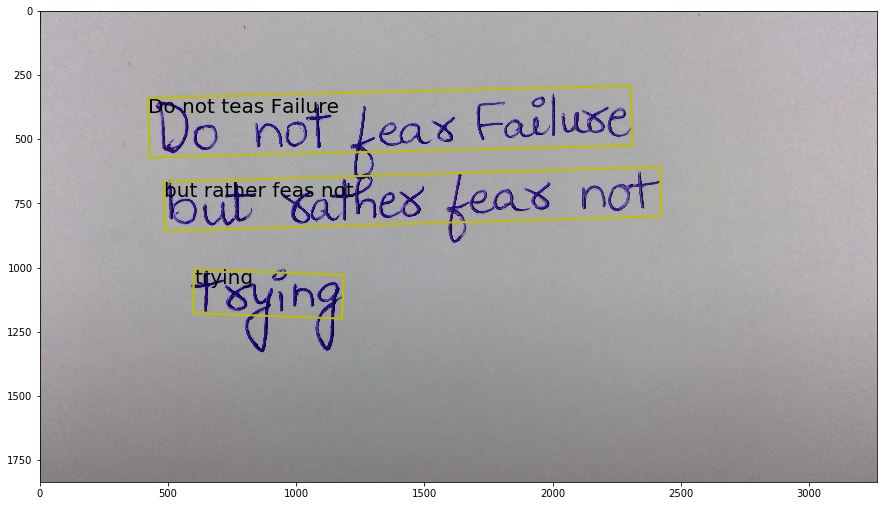

In [13]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

text_recognition_url = endpoint + "/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
# image_url = "https://upload.wikimedia.org/wikipedia/commons/d/dd/Cursive_Writing_on_Notebook_paper.jpg"
image_path = "C:/Users/clpan/OneDrive/Pictures/Camera Roll/handwritingtest_2.jpg"
# Read the image into a byte array
image_data = open(image_path, "rb").read()
data=image_data
# Set Content-Type to octet-stream
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
# put the byte array into your post request
response = requests.post(text_recognition_url, headers=headers, params=params, data = image_data)
# response = requests.post(
#     text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(image_data))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")